Computational modeling in python, SoSe2022

# Ordinary differential equations

An ordinary differential equation (ODE) is a linear polynomial of functions and their derivatives as

\begin{align}
q_0(t)y(t) + q_1(t) \frac{dy}{dt} + q_2(t) \frac{d^2y}{dt^2} + \ldots + q_n(t) \frac{d^{(N)}y}{dt^{(N)}} + b(t) = 0
\label{eq:ODE} \tag{1}
\end{align}

of one independent variable $t$ (contrary to *partial differential equations* where there are multiple independent  variables). The functions $q(t)$ are arbitrary differentiable functions in $t$, and $y$ is the unknown function. Most typically you will see an ODE of the form

\begin{align}
a \frac{d^2y}{dt^2}  = F(y(t))
\end{align}

where F is a function of y(t). For example, Newton's equation of motion follow this form.

The first step is usually to decompose the second (or more generally, higher-order) derivative into a set of first-order derivatives

\begin{align}
 \frac{dy}{dt} & = z(t) \\
  \frac{dz}{dt}& = r(t)-q(t)z(t) \\
\end{align}

where $z$ is a new variable, which is chosen as the derivative of the original value (and so on for higher-order ODEs). We can cast this into a matrix form:

\begin{align}
\begin{pmatrix}
0 & 1   \\
0 & - q(t)  
\end{pmatrix}
\begin{pmatrix}
y(t)   \\
z(t)
\end{pmatrix}
+ \begin{pmatrix}
0\\
r(t) 
\end{pmatrix}
= \begin{pmatrix}
\dot y(t)   \\
\dot z(t)
\end{pmatrix}
\end{align}




The equation is therefore decomposed into $N$ coupled first-order differential equations (with $N$ the highest derivative in the ODE):

\begin{align}
 \frac{dy_i}{dt} & = f_i(t,y_1,y_2,\ldots,y_N) 
\end{align}

with index $i=\lbrace 1,2,\ldots,N\rbrace$. Or in matrix form for Eq. (1): First solve for the highest order 
derivative:

\begin{align}
\frac{d^{(N)}y}{dt^{(N)}} = y_N = - \frac{q_0(t)}{q_N(t)} y_0 - \frac{q_1(t)}{q_N(t)} y_1 \ldots  -\frac{q_{N-1}(t)}{q_N(t)} y_{N-1} - \frac{b(t)}{q_N(t)}
\end{align}

Let's rename the coefficients for brevity:

\begin{align}
 y_N =  \dot y_{N-1} =  a_0(t) y_0 + a_i(t) y_1 \ldots  a_{N-1}(t) y_{N-1} + c(t)  
\end{align}

Then note that the derivative of $y_i$ is $y_{i+1}$ and use this to cast the equation into a matrix form:

\begin{align}
\begin{pmatrix}
 0      &  1       &  0     &  \ldots &     0      \\
 0      &  0       &  1     &  \vdots &     \vdots \\
 0      &  0      &  0      &  \ldots &            \\
 0      &  0      &  0      &  \ldots &            \\
 a_0(t) &  a_1(t) &  a_2(t) &  \ldots & a_{N-1}(t) \\
\end{pmatrix}
\begin{pmatrix}
 y_0 \\
 y_1 \\
  y_2 \\
 \vdots \\
  y_{N-1}\\
\end{pmatrix} + 
\begin{pmatrix}
 0 \\
 0 \\
 0 \\
 \vdots \\
  c(t)\\
\end{pmatrix} 
= 
\begin{pmatrix}
\dot y_0 \\
\dot y_1 \\
\dot y_2 \\
 \vdots \\
\dot  y_{N-1}\\
\end{pmatrix}
\end{align}

So we have now a linear system of equations as

\begin{align}
\dot{\vec{y}} = A \vec{y} + \vec{c} 
\end{align}

# Boundary conditions

The boundary conditions are extremely important for an ODE, as they allow a mapping of the values $y$ onto consecutive values. The problem that is described by an ODE is not completely defined by only the equation but also requires an initial $f(t)$, which can be its numerical value or a function. In our applications, the boundary conditions are always the initial values, and the ODE is the solution to an initial value problem. In the context of quantum mechanics (time-independent Schrodinger equation) we will talk about solutions to eigensystems. An initial value problem as in quantum dynamics (time-dependent Schrodinger equation) is conceptually simpler.

In practice, the derivative $dy/dt$ is expressed as a numerical (finite) difference $\Delta y$ over $\Delta t$. This maps the change in the functions over the step size $\Delta t$. The accuracy then depends on the step size and the numerical approach. Different methods are available that solve this problem:
- Runge-Kutta methods (with the Euler method as the simplest of them)
- Richardson extrapolation (Bulirsch-Stoer)
- predictor-corrector methods
- Lanczos methods
- $\ldots$

A side note:\
In the context of classical mechanics where the dynamics is governed by a Hamiltonian $\mathcal{H}(q,p)$ with conjugated coordinates $q$ and momenta $p$, the "symplectic" property of an integrator is often discussed. A symplectic integrator preserves the geometry of the flow; this means basically that the area that is mapped in the derivatives is conserved and does not change from one to the next mapping, i.e., the volume element in phase space is conserved. Symplectic integrators can be more efficient depending on the problem at hand (as they automatically follow Hamilton mechanics - according to some effective Hamiltonian).


As an example, we will look at the classical harmonic oscillator: a mass on a spring. Newton's law states that

\begin{align}
F(x,t) &= \frac{dp}{dt} = m \frac{d^2x}{dt^2} 
\end{align}

and Hooke's law states that

\begin{align}
F(x,t) &= -\frac{dV}{dx} = -kx
\end{align}

with $k$ being the spring constant. Combining the two, we obtain the equation of motion for one particle in a harmonic potential well as

\begin{align}
m \frac{d^2x}{dt^2} = -kx
\end{align}

or with $\omega^2 = k/m$, we obtain

\begin{align}
\frac{d^2x}{dt^2} = \frac{dv}{dt} = -\omega^2 x
\end{align}

We know that a solution to this equation is

\begin{align}
x(t) = A \sin (\omega t) + B \cos (\omega t)
\end{align}

where $A$ and $B$ depend on the boundary conditions.


## Runge-Kutta methods

We rewrite the above equation of motion as
\begin{align}
\frac{d v}{dt} & = -\omega^2x \\
\frac{d x}{dt} & = v
\end{align}
resulting in two coupled first-order equations. In standard textbooks, problems like the classical harmonic oscillator are solved using the velocity verlet or leapfrog algorithm, which are second-order methods. Velocity verlet and the derived methods are symplectic methods, which the standard Runge-Kutta methods are not; however, we will use it here as a first step towards applying it to a quantum-mechanical problem.

### Euler method
0. Time discretisation: Chose a time step
1. The first step is the calculation of the velocity at $t+dt$, assuming that $dv/dt$ is constant over the time interval $dt$.
2. The second step is the calcuation of the position at $t+dt$, assuming that $v$ is constant over $dt$.
3. The third step is updating the velocity and position to the new values and repeating from 1.


In [1]:
from numpy import *
import matplotlib.pyplot as plt
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']

#initial position
x0 = 4.0

#initial time
t0 = 0.0

#initial velocity
v0 = 0.0

#mass in kg
m = 1

#spring constant in N/m
k = 100
#time step in s
dt = 0.00001
#final time in s
tf = 5.0
#get the number of time steps
tsteps = int((tf-t0)/dt)

#set the initial conditions
xt = zeros(tsteps)
vt = zeros(tsteps)
xt[0] = x0
vt[0] = v0
omega2=k/m
omega= sqrt(k/m)

def update_xv(xin,vin,dt,omega2):
    v = vin + -dt * omega2 * xin 
    x = xin + dt*vin 
    return x,v

#do the propagation
t = linspace(t0,tf,tsteps)
for i in range(1,tsteps):
    xt[i],vt[i] = update_xv(xt[i-1],vt[i-1],dt,omega2)

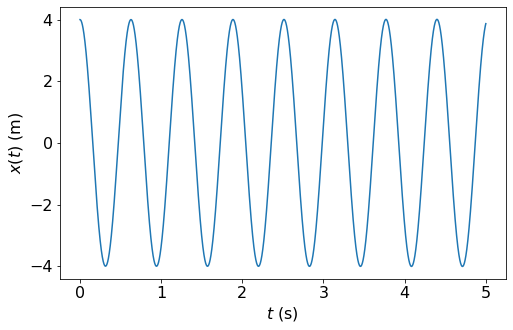

In [2]:
#let's plot the results
mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t,xt)
ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

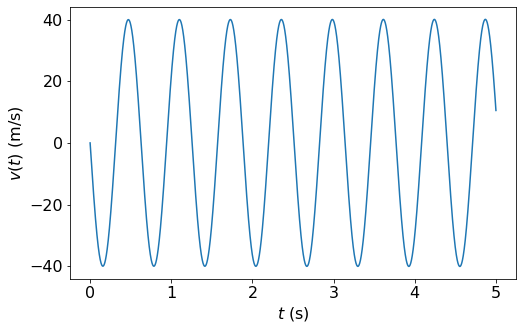

In [29]:
#let's plot the results
mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t,vt)
ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$v(t)$ (m/s)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

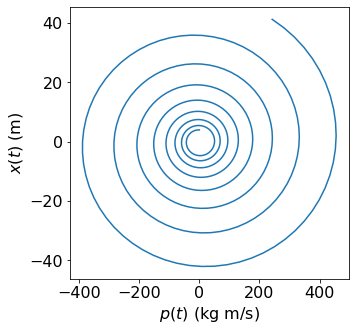

In [23]:
#we can plot this also in phase space
#let's plot the results
#a harmonic oscillator in phase space is a circle
mf=16
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(vt*m,xt)
ax.yaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$p(t)$ (kg m/s)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
plt.show()

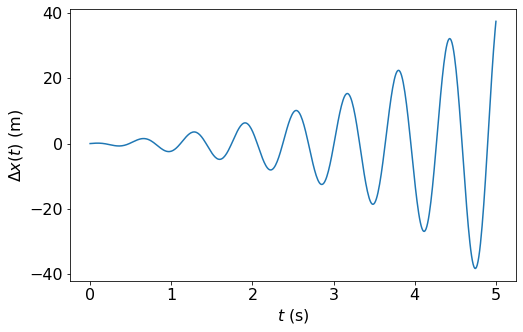

In [24]:
#let's plot the Error to the analytic solution
mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t,xt - 4*cos(omega*t))
ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$\Delta x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

### Symplectic Euler method

1. The first step is the calculation of the velocity at $t+dt$, assuming that $dv/dt$ is constant over the time interval $dt$.
2. The second step is the calcuation of new the position at $t+dt$, with the previously calculated $v$
3. The third step is updating the velocity and position to the new values and repeating from 1.

In [13]:
# initial position
x0 = 4.0

# initial time
t0 = 0.0

# initial velocity
v0 = 0.0

# mass in kg
m = 1

# spring constant in N/m
k = 100

# time step in s
dt = 0.001

# final time in s
tf = 5.0

# get the number of time steps
tsteps = int((tf-t0)/dt)

# set the initial conditions
# and allocate space for the results
xts = zeros(tsteps)
vts = zeros(tsteps)
xts[0] = x0
vts[0] = v0
omega2=k/m
omega= sqrt(k/m)

def update_xv_symplectic(xin,vin,dt,omega2):
    v = vin + -dt * omega2 * xin 
    x = xin + dt*v  #  UPDATED v
    return x,v

# do the propagation
t = linspace(t0,tf,tsteps)
for i in range(1,tsteps):
    xts[i],vts[i] = update_xv_symplectic(xts[i-1],vts[i-1],dt,omega2)
    

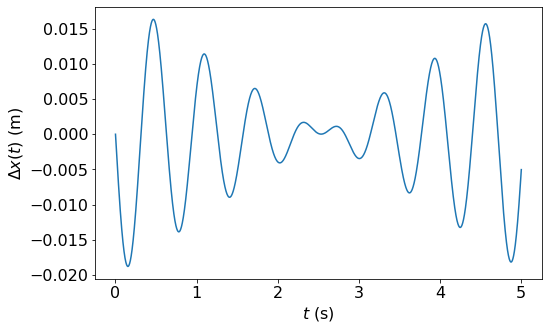

In [14]:
#let's plot the Error to the analytic solution

mf=16
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(t,xts - 4*cos(omega*t))

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$\Delta x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

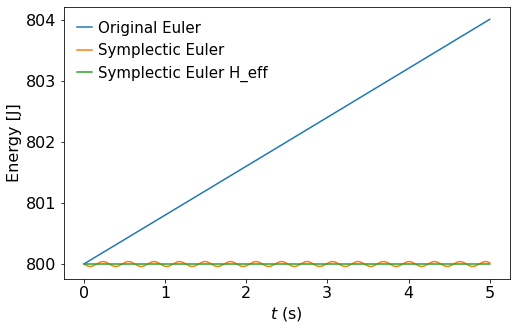

In [8]:
Energy_orig = m*vt**2/2 + k*xt**2/2
Energy   = m*vts**2/2 + k*xts**2/2
Energy_s = m*vts**2/2 + k*xts**2/2 - k*vts*xts*dt/2


#let's plot the Error to the analytic solution
mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t, Energy_orig, label="Original Euler")
ax.plot(t, Energy, label="Symplectic Euler")
ax.plot(t, Energy_s, label="Symplectic Euler H_eff")
ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('Energy [J]',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)

ax.legend(handlelength=1, handletextpad=0.4,frameon=False,
              loc="best", prop={'size': 15})
plt.show()


### Runge-Kutta method of second order (RK2)

As the Euler method assumes that $dv/dt$ is constant over $dt$, the errors accumulate quickly unless the time step is very small. The RK2 method improves upon that by taking into account the slope. For a general differential equation such as

\begin{align}
\frac{dy}{dt} = f( t , y(t) ) 
\end{align}

where the right-hand side is a function of both the variable $t$ and $y(t)$, which itself is a function of $t$. The RK2 method evaluates $y(t)$ as

\begin{align}
y(t + dt) &= y(t) + k_2 \\
k_2 &= dt \cdot f( t+dt/2 , y(t)+ k_1/2 ) \\
k_1 &= dt \cdot f( t , y(t) )\\
\end{align}

- k1 - Euler step


In the classical harmonic oscillator, this is for $\frac{dx}{dt}$:

\begin{align}
x(t + dt) &= x(t) + k_{2,x} \\
k_{2,x} &= dt \cdot (v(t) + (dv/dt) \cdot dt/2) = dt \cdot (v(t) -\omega^2 x(t) \cdot dt/2)
\end{align}

where it now becomes clear that $x(t + dt)$ is evaluated using the slope of $x(t)$ at the midpoint $dt/2$. For $v(t + dt)$, we need to evaluate

\begin{align}
v(t + dt) &= v(t) + k_{2,v} \\
k_{2,v} & = -\omega^2 dt \cdot x(t+dt/2) = -\omega^2 dt \cdot  (x(t) + (dx/dt)\cdot dt/2) = -\omega^2 dt \cdot  (x(t) + v(t)\cdot dt/2)
\end{align}

again taking into account the slope of the function (the acceleration) at the midpoint to get a better estimate at the endpoint of the interval $dt$.

In [25]:
# RK2

# initial position
x0 = 4.0

# initial time
t0 = 0.0

# initial velocity
v0 = 0.0

# mass in kg
m = 1

#spring constant in N/m
k = 100

# time step in s
dt = 0.00001

# final time in s
tf = 5.0

# get the number of time steps
tsteps = int((tf-t0)/dt)

# set the initial conditions
xtRK2 = zeros(tsteps)
vtRK2 = zeros(tsteps)
xtRK2[0] = x0
vtRK2[0] = v0
omega2=k/m

def update_xv_RK2(xin,vin,dt,omega2):
    k2 = dt * (vin - omega2 * xin * dt/2)
    x = xin + k2
    k2 = -omega2 * dt * (xin + vin*dt/2)
    v = vin + k2
    return x,v

# do the propagation
tRK2 = linspace(t0,tf,tsteps)
for i in range(1,tsteps):
    xtRK2[i],vtRK2[i] = update_xv_RK2(xtRK2[i-1],vtRK2[i-1],dt,omega2)

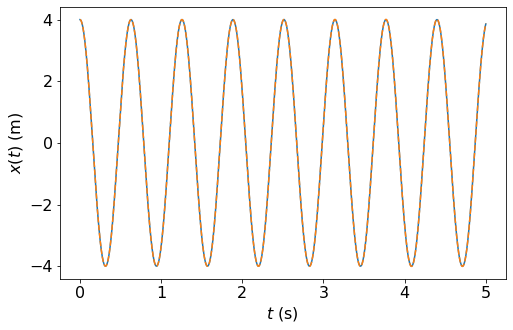

In [30]:
#let's plot the results
mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tRK2,xtRK2)
ax.plot(t,xt,linestyle = '--')

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

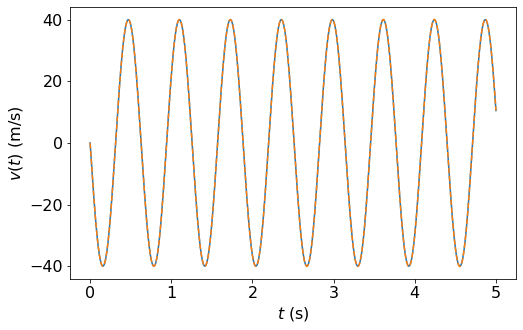

In [31]:
#let's plot the results
mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tRK2,vtRK2)
ax.plot(t,vt,linestyle = '--')

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$v(t)$ (m/s)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

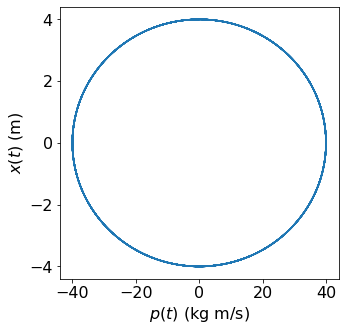

In [33]:
#we can plot this also in phase space
#let's plot the results
#a harmonic oscillator in phase space is a circle
mf=16
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(vtRK2*m,xtRK2)
ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$p(t)$ (kg m/s)',fontsize=mf)
plt.show()

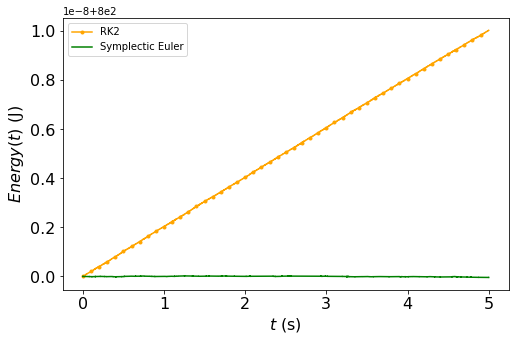

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
#ax.plot(t,0.5*vt**2+0.5*omega2*m*xt**2,label='Original Euler', color='blue')
ax.plot(tRK2,0.5*vtRK2**2+0.5*omega2*m*xtRK2**2,label='RK2', marker='.', markevery=10000, color='orange')
ax.plot(t,Energy_s,label='Symplectic Euler', color='green')
ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$Energy(t)$ (J)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.legend()
plt.show()

Higher-order Runge-Kutta methods use even more parameters to evaluate the derivative, making use of error cancellation of the higher-order terms. The order signifies how many points are evaluated for each time step. While RK4 is not necessarily more accurate than RK2, it is more stable. A typical integrator is the RK8 integrator (eighth order Runge-Kutta). All RK methods can be extended to using an adaptive stepsize, where the required time step is calculated on-the-fly using an error estimate with pre-set parameters.

While Runge-Kutta methods are very robust, they are not highly accurate.


## Bulirsch-Stoer method

The Bulirsch-Stoer methods are more accurate than the Runge-Kutta methods, however may run into problems for a time evolution that is not very smooth. This approach makes use of Richardson extrapolation and function evaluation at substeps. The number of substeps to approach the full stepsize varies, depending on the difference between extrapolated and evaluated function. In this way, the error is controlled during the process, resulting in an adaptive step-size. The variants of this methods mostly differ in the kind of function that is used in the fitting step (i.e., polynomial or rational function).


## Predictor-corrector methods

Predictor-corrector methods start out with a "predictor", an extrapolation of how the function is expected to behave. In a second step, this prediction is corrected by using the predicted value and an interpolation to the "real" value. As such, not only the point of the previous time-step, $y(t)$, is used to evaluate $y(t+dt)$, but also one or several previous points, $y(t-dt)$, $y(t-2dt)$, etc, or even the next point in time, $y(t+dt)$.

In terms of accuracy and robustness, predictor-corrector methods lie in between the Bulirsch-Stoer and Runge-Kutta methods.

# Using scipy for ODEs

Of course, there is an ODE function in the scipy integrate module
https://docs.scipy.org/doc/scipy/reference/integrate.html

Here you can find a variety of methods, such as different variants of the RK methods. In the following, we will use the scipy function for the classical harmonic oscillator example.

We will use the newer IVP routines which are easier to use, note however that there are also the older ODE and ODEINT routines, that may be more efficient in some cases (as they are based on very efficient Fortran code). Solve_IVP is a convenient interface to the different methods.

For this to work, we first need to recast our system of differential equations in vector form (sould $x$ and $v$ be vectors themselves they are just concatenated as $u=(v_1, v_2, \cdots, x_1, x_2,\cdots $):
\begin{align}
\frac{d }{dt} 
\begin{pmatrix} 
v \\
x
 \end{pmatrix} 
 & = 
 \frac{d }{dt}  u =
\begin{pmatrix} 
-\omega^2x \\
v
 \end{pmatrix} 
\end{align}

In [3]:
#from scipy.integrate import odeint
from scipy.integrate import solve_ivp

#our usual parameters and initial conditions

#initial position
x0 = 4.0

#initial time
t0 = 0.0

#initial velocity
v0 = 0.0

#mass in kg
m = 1

#spring constant in N/m
k = 100

# scipy will now take care of the time step
#dt = 0.01

#final time in s
tf = 5.0

#get the number of time steps
#tsteps = int((tf-t0)/dt)

#define the derivative in vector form
def deriv(t, u, omega2):
#def deriv(u, t, omega2):
    v, x = u
    dydt = [-omega2 * x, v]
    return dydt

#set the initial conditions
y0 = [v0, x0]
omega2=k/m

#ts = linspace(t0,tf,tsteps)
ts = [t0,tf]

# solve with RK4
#ode = solve_ivp(deriv, ts, y0, method='RK45', args=(omega2,))

ode = solve_ivp(deriv, ts, y0, method='DOP853', args=(omega2,), rtol=1e-10, atol = 1e-10)

# old interface, sometimes faster as implemented in Fortran
#ode = odeint(deriv, y0, ts, args=(omega2,))

#print(ode.y[0])
#print(ode.t)

NameError: name 'tRK2' is not defined

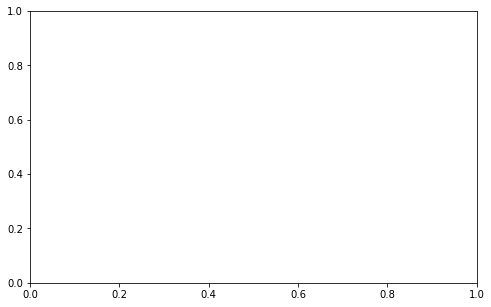

In [4]:
#let's plot the results
mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tRK2,xtRK2,marker='.',markevery=20,label='RK2')
ax.plot(ode.t,ode.y[1],marker='x',markevery=20,label='ode')
#ax.plot(ts,ode[:,1],marker='x',markevery=20,label='odeint')


ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

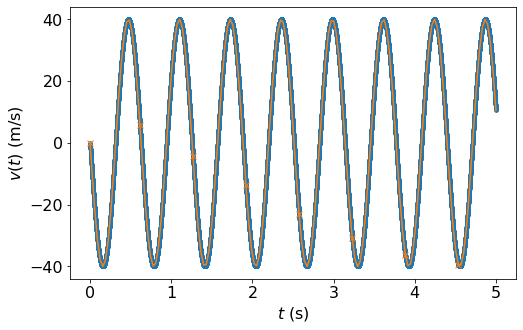

In [41]:
#let's plot the results
mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tRK2,vtRK2,marker='.',markevery=20,label='RK2')
ax.plot(ode.t,ode.y[0],marker='x',markevery=20,label='ode')
#ax.plot(ts,ode[:,0],marker='x',markevery=20,label='odeint')


ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$v(t)$ (m/s)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$t$ (s)',fontsize=mf)
plt.show()

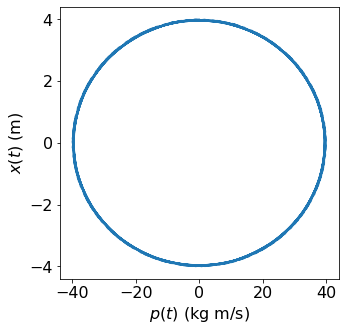

In [42]:
#we can plot this also in momentum space
#let's plot the results
#a harmonic oscillator in momentum space is a circle
mf=16
fig, ax = plt.subplots(figsize=(5,5))
#ax.plot(ode[:,0]*m,ode[:,1])
ax.plot(ode.y[0]*m,ode.y[1])

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$x(t)$ (m)',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$p(t)$ (kg m/s)',fontsize=mf)
plt.show()

# Damped harmonic oscillator

In a damped harmonic oscillator, the vibrational motion of the oscillator is damped through a frictional force with damping coefficient $c$, extending the balance of forces to 
\begin{align}
m \frac{d^2x}{dt^2} = -m \omega^2 x - c \frac{dx}{dt}
\end{align}
Introducing the damping ratio $\zeta = \frac{c}{2\sqrt{mk}}=\frac{c}{2m \omega}$ and dividing by $m$ we obtain
\begin{align}
 \frac{d^2x}{dt^2} = - \omega^2 x - 2 \omega \zeta \frac{dx}{dt}
\end{align}
This leads to the following equation in vector form
\begin{align}
\frac{d }{dt} 
\begin{pmatrix} 
v \\
x
 \end{pmatrix} 
 & = 
 \frac{d }{dt}  u =
\begin{pmatrix} 
-\omega^2x - 2 \omega \zeta v \\
v
 \end{pmatrix} 
\end{align}

# Task 1: The damped harmonic oscillator

Perform an ODE integration using scipy for a damped harmonic oscillator with the above parameters and $\zeta = 0.1$ (underdamped). Plot position versus time, velocity versus time, and position versus momentum.

# Task 2 (optional): The Kepler problem in 2D

Perform an ODE integration using scipy ODE integration for a planet evolving around a star at fixed position $(x_S,y_S) = (0,0)$. 
The force on the planet at position $\vec{r}=(x,y)$ is given by:

\begin{align}
 \vec{F}(x,y) = \vec{F}(\vec{r}) = G \frac{M m}{|\vec{r}|^3} \vec{r} 
\end{align}

where $M$ is the mass of the star, $m$ is the mass of the planet and $G$ is the gravitational constant. Use $G M m = -1$ and chose as initial conditions $\vec{r} = (5,0)$, $\vec{v} = \dot{\vec{r}} = (0,0.3)$

Plot the orbit for the interval $t=[0,37]$. (How would you detect when an orbit is completed? Check the `event` option of `solve_ivp`.)

Show numerically that Keplers second law is fulfilled: the connecting line between the star and the planet sweeps ower equal areas in equal times. You may calulare an infenitesimal area $dA(t)$ by  using the relation $dA = \frac{1}{2} \left|\vec{r}\times \vec{v}\right| dt $ and prove that $ \left|\vec{r}\times \vec{v}\right| = {\rm const}$ (within numerical accuracy). Check also if the energy $E=\frac12 v^2-\frac1{r} $ is conserved (within numerical accuracy). 

(Hint: when plotting constant data that changes on some microscopic scale, matplotlib will, if optons like y-limits are not set explicitly, adjust to the scale and only show a tiny indicator of the scale in the top left of the image such that one may mistakenly assume that the tiny changes of the data are huge) 

1/2 abs(r x v)